In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
student = { 0: 0.,
            1: 12.7062, 2: 4.3027,  3: 3.1824,  4: 2.7764,  5: 2.5706,  6: 2.4469,  7: 2.3646,  8: 2.3060,
            9: 2.2622, 10: 2.2281, 11: 2.2010, 12: 2.1788, 13: 2.1604, 14: 2.1448, 15: 2.1314, 16: 2.1199,
           17: 2.1098, 18: 2.1009, 19: 2.0930, 20: 2.0860}

**1. Построим график средней точности при конкретном значении $\lambda$.**

In [3]:
data1 = joblib.load('fully-connected-ewc-fisher.dmp')
data2 = joblib.load('fully-connected-ewc-si.dmp')

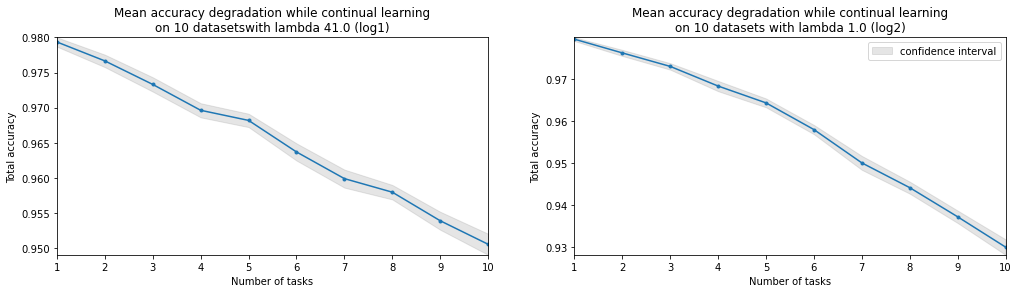

In [4]:
lmbda1, lmbda2 = 41., 1.
means1 = np.mean(data1[lmbda1], axis=0)
intervals1 = np.std(data1[lmbda1], axis=0) * student[len(data1[lmbda1])-1] / np.sqrt(len(data1[lmbda1]))
means2 = np.mean(data2[lmbda2], axis=0)
intervals2 = np.std(data2[lmbda2], axis=0) * student[len(data2[lmbda2])-1] / np.sqrt(len(data2[lmbda2]))
x = range(1, len(means1) + 1)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 4)
)
for ax, means, intervals in zip((ax1, ax2), (means1, means2), (intervals1, intervals2)):
    ax.set_ylim(np.min(means-intervals), np.max(means+intervals))
    ax.set_xlim(min(x), max(x))
    ax.set_ylabel('Total accuracy')
    ax.set_xlabel('Number of tasks')
    ax.fill_between(x, means-intervals, means+intervals, color='grey', alpha=.2, label='confidence interval')
    ax.plot(x, means, marker=".")
ax1.set_title(f'Mean accuracy degradation while continual learning\non {len(means1)} datasets'
              f'with lambda {lmbda1} (log1)')
ax2.set_title(f'Mean accuracy degradation while continual learning\non {len(means2)} datasets '
              f'with lambda {lmbda2} (log2)')
plt.legend()
plt.show()

In [5]:
def func1(X, Y):
    return [np.mean(data1[l], axis=0)[n-1] for l, n in zip(X, Y)]

def func2(X, Y):
    return [np.mean(data2[l], axis=0)[n-1] for l, n in zip(X, Y)]

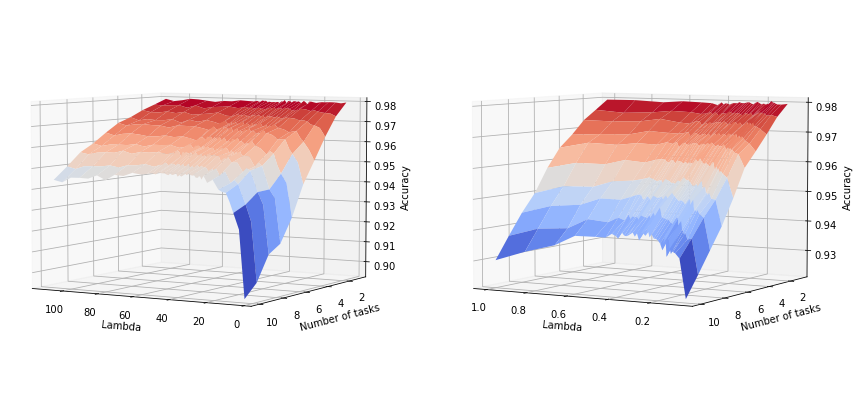

In [6]:
fig = plt.figure(figsize=(29, 7))
ax1 = fig.add_subplot(111, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
x1 = sorted(list(data1.keys()))
y1 = list(range(1, 11))
X1, Y1 = np.meshgrid(x1, y1)
zs1 = np.array(func1(np.ravel(X1), np.ravel(Y1)))
Z1 = zs1.reshape(X1.shape)
ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm)
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Number of tasks')
ax1.set_zlabel('Accuracy')
ax1.set_zlim(min(zs1), max(zs1))
ax1.view_init(5, 120)

x2 = sorted(list(data2.keys()))
y2 = list(range(1, 11))
X2, Y2 = np.meshgrid(x2, y2)
zs2 = np.array(func2(np.ravel(X2), np.ravel(Y2)))
Z2 = zs2.reshape(X2.shape)
ax2.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Number of tasks')
ax2.set_zlabel('Accuracy')
ax2.set_zlim(min(zs2), max(zs2))
ax2.view_init(5, 120)

plt.show()

**2. Посмотрим график точности после обучения 10-му датасету.**

In [7]:
data1 = joblib.load('fully-connected-ewc-fisher.dmp')
data2 = joblib.load('fully-connected-ewc-mas.dmp')
data3 = joblib.load('fully-connected-ewc-si.dmp')

In [8]:
lmbda1, lmbda2, lmbda3 = 14, 1., 0.25

In [9]:
means1 = np.mean(data1[lmbda1], axis=0)
intervals1 = np.std(data1[lmbda1], axis=0) * student[len(data1[lmbda1])-1] / np.sqrt(len(data1[lmbda1]))
means2 = np.mean(data2[lmbda2], axis=0)
intervals2 = np.std(data2[lmbda2], axis=0) * student[len(data2[lmbda2])-1] / np.sqrt(len(data2[lmbda2]))
means3 = np.mean(data3[lmbda3], axis=0)
intervals3 = np.std(data3[lmbda3], axis=0) * student[len(data3[lmbda3])-1] / np.sqrt(len(data3[lmbda3]))

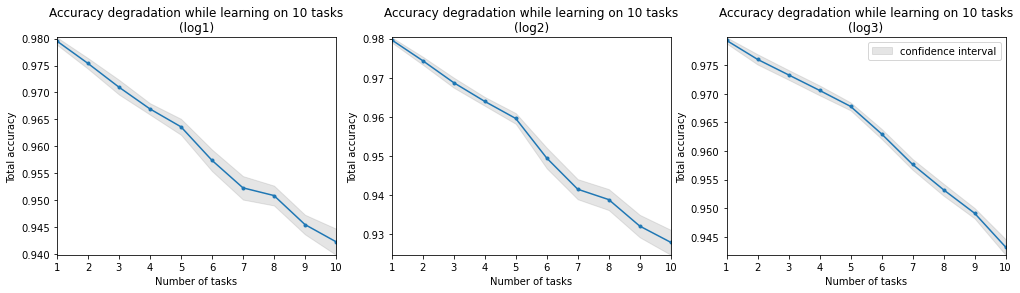

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
x = np.arange(1, 11)
for ax, means, intervals in zip((ax1, ax2, ax3), (means1, means2, means3), (intervals1, intervals2, intervals3)):
    ax.set_ylim(np.min(means-intervals), np.max(means+intervals))
    ax.set_xlim(min(x), max(x))
    ax.set_ylabel('Total accuracy')
    ax.set_xlabel('Number of tasks')
    ax.fill_between(x, means-intervals, means+intervals, color='grey', alpha=.2, label='confidence interval')
    ax.plot(x, means, marker=".")

ax1.set_title(f'Accuracy degradation while learning on {len(means1)} tasks\n'
              f'(log1)')
ax2.set_title(f'Accuracy degradation while learning on {len(means2)} tasks\n'
              f'(log2)')
ax3.set_title(f'Accuracy degradation while learning on {len(means3)} tasks\n'
              f'(log3)')
plt.legend()
plt.show()

In [11]:
print(sorted(data1.keys()))
print(sorted(data2.keys()))
print(sorted(data3.keys()))

[4, 7, 10, 12, 14, 16, 18, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
[0.5, 1, 1.5, 2, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.5, 8, 9, 10, 12, 14, 16, 19, 22]
[0.07, 0.1, 0.12, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.42, 0.45, 0.5, 0.6, 0.7, 0.85, 1]


In [12]:
l1 = sorted(list(data1.keys()))
means1 = np.asarray([np.mean(data1[l], axis=0)[9] for l in l1])
intervals1 = np.asarray([np.std(data1[l], axis=0)[9] * student[len(data1[l])-1] / np.sqrt(len(data1[l])) for l in l1])

l2 = [k for k in sorted(list(data2.keys())) if k <13]  # sorted(list(data2.keys()))
means2 = np.asarray([np.mean(data2[l], axis=0)[9] for l in l2])
intervals2 = np.asarray([np.std(data2[l], axis=0)[9] * student[len(data2[l])-1] / np.sqrt(len(data2[l])) for l in l2])

l3 = [k for k in sorted(list(data3.keys())) if k <=1]  # sorted(list(data3.keys()))
means3 = np.asarray([np.mean(data3[l], axis=0)[9] for l in l3])
intervals3 = np.asarray([np.std(data3[l], axis=0)[9] * student[len(data3[l])-1] / np.sqrt(len(data3[l])) for l in l3])

In [13]:
for l, means, intervals in zip([l1, l2, l3], [means1, means2, means3], [intervals1, intervals2, intervals3]):
    maxmean = max(means)
    for idx in range(len(l)): 
        if means[idx]==maxmean: break
    print(f'lambda: {l[idx]}, max mean accuracy {means[idx]}, interval {intervals[idx]}')

lambda: 41, max mean accuracy 0.9505465000000001, interval 0.001498223489389255
lambda: 4.5, max mean accuracy 0.9553235000000001, interval 0.0007585245036570942
lambda: 0.25, max mean accuracy 0.9432055, interval 0.0013700171724803911


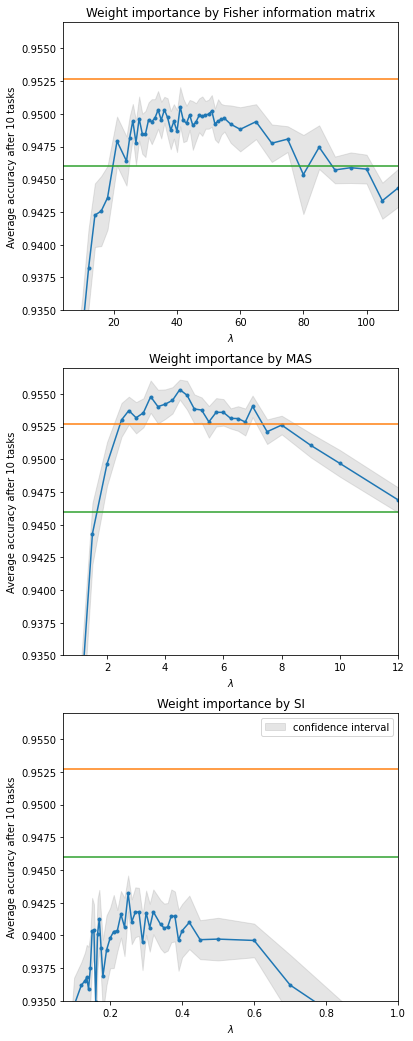

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1,
    figsize=(6, 18)
)
for ax, means, intervals, l in zip((ax1, ax2, ax3), (means1, means2, means3), (intervals1, intervals2, intervals3), (l1,l2,l3)):
    ax.set_ylim(0.935, 0.957)  # np.min(means-intervals), np.max(means+intervals)
    ax.set_xlim(min(l), max(l))
    ax.set_ylabel('Average accuracy after 10 tasks')
    ax.set_xlabel(r'$\lambda$')
    ax.fill_between(l, means-intervals, means+intervals, color='grey', alpha=.2, label='confidence interval')
    ax.plot(l, means, marker=".")
    ax.plot([min(l), max(l)], [0.9527, 0.9527])
    ax.plot([min(l), max(l)], [0.946, 0.946])

ax1.set_title('Weight importance by Fisher information matrix')
ax2.set_title('Weight importance by MAS')
ax3.set_title('Weight importance by SI')
plt.legend()
plt.show()